# **Student Performance Prediction using Linear Regression, Random Forest Regression, XGBoost Regression**

## **Step 1: Import Libraries**

In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# **Step 2: Load Dataset**

In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [4]:
data.shape

(10000, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [7]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## **Step 3: Data Preprocessing**

### **Encode the categorical feature**

In [8]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [9]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(127)

In [ ]:
# Drop duplicate records
data.drop_duplicates(inplace=True)

In [ ]:
# Confirm no duplicates left
data.duplicated().sum()

np.int64(0)

In [ ]:
# Again Check Rows shape
data.shape

(9873, 6)

In [14]:
# Save the cleaned dataset
processed_path = "Processed_Student_Performance.csv"
data.to_csv(processed_path, index=False)
print(f"Processed dataset saved as {processed_path}")

Processed dataset saved as Processed_Student_Performance.csv


# **Step 4: Visualize Feature Relationships**

### **Scatter plots**

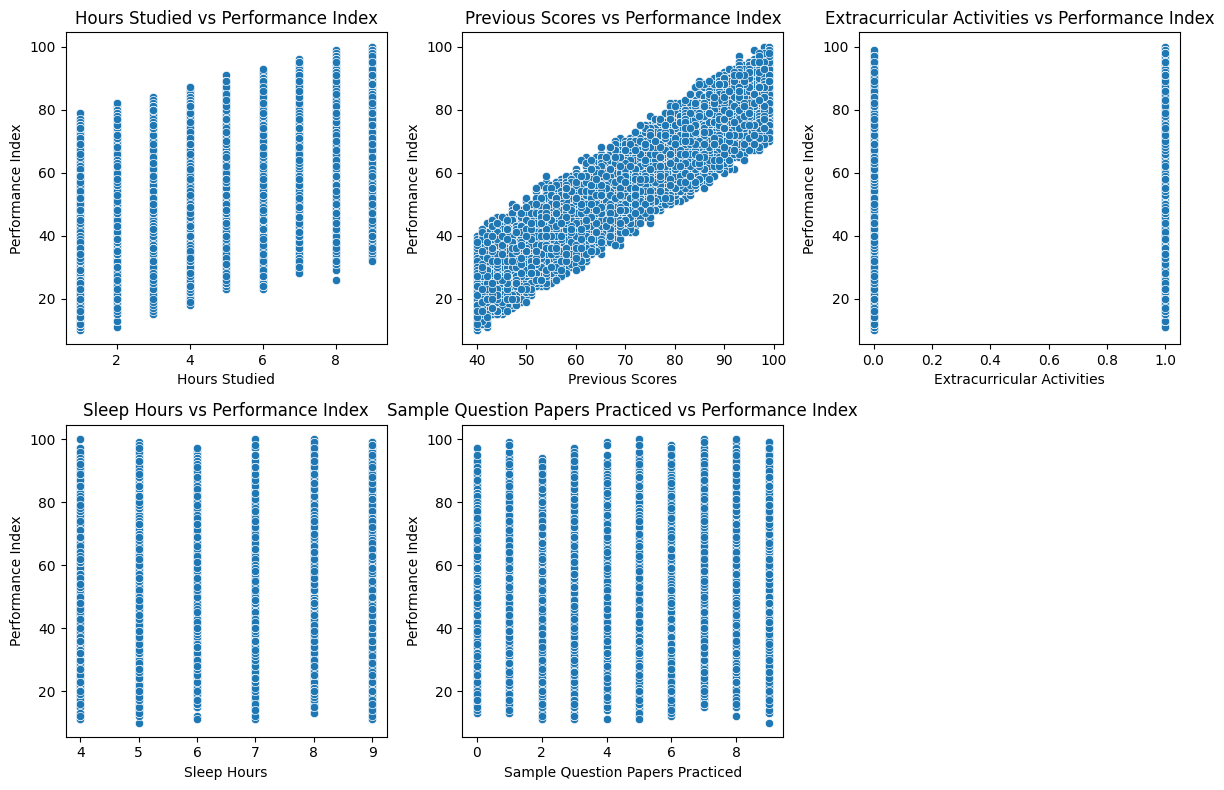

In [15]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[col], y=data['Performance Index'])
    plt.title(f'{col} vs Performance Index')
plt.tight_layout()
plt.show()    

### **Correlation heatmap**

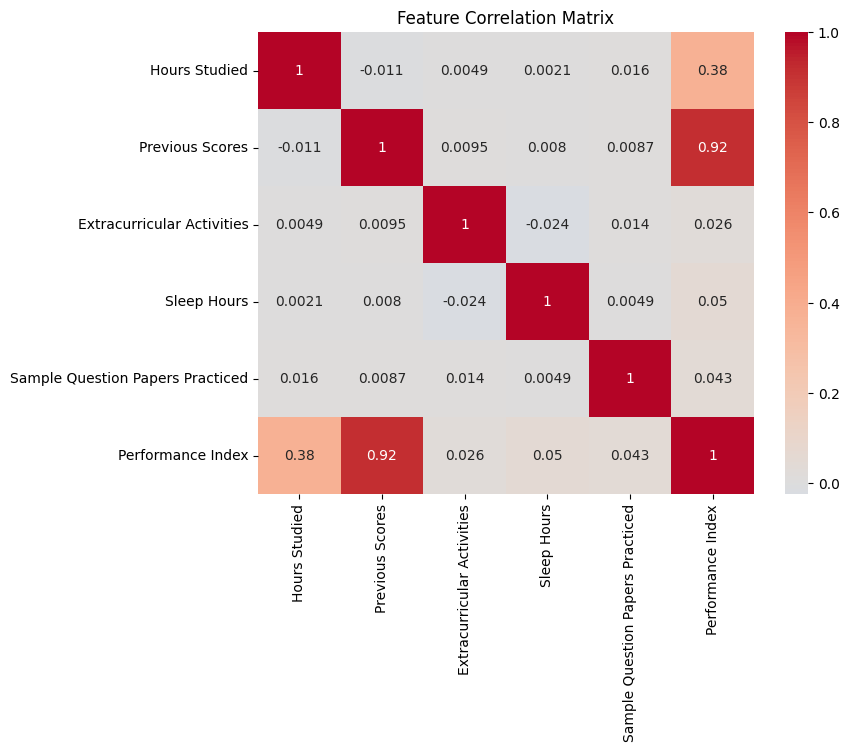

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## **Step 5: Split Features and Target**

In [17]:
X = data.drop("Performance Index", axis=1)
y = data['Performance Index']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Step 6: Train Linear Regression Model**

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [21]:
y_pred_train

array([55.22544719, 33.83828856, 20.66107741, ..., 81.09107901,
       20.98458319, 81.94612608])

In [22]:
y_pred_test

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

## **Step 7: Model Evaluation**


In [23]:
print("Training Evaluation:")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"R² Score: {r2_score(y_train, y_pred_train):.2f}")

Training Evaluation:
MAE: 1.62
MSE: 4.14
RMSE: 2.04
R² Score: 0.99


In [24]:
print("Test Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_test):.2f}")


Test Evaluation:
MAE: 1.65
MSE: 4.31
RMSE: 2.08
R² Score: 0.99


## **Step 8: Show Predictions**

In [25]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_test,
    'Error': abs(y_test - y_pred_test)
})
print(results.head(10))

      Actual  Predicted     Error
6099      47  46.480013  0.519987
106       76  80.285379  4.285379
9265      62  61.065188  0.934812
4707      23  22.706315  0.293685
2155      76  74.836868  1.163132
6594      83  84.194968  1.194968
9438      60  61.993141  1.993141
8905      51  50.337443  0.662557
2012      38  38.898681  0.898681
568       58  55.753202  2.246798


## **Step 9: Visualizations**

### **1. Residual Plot**

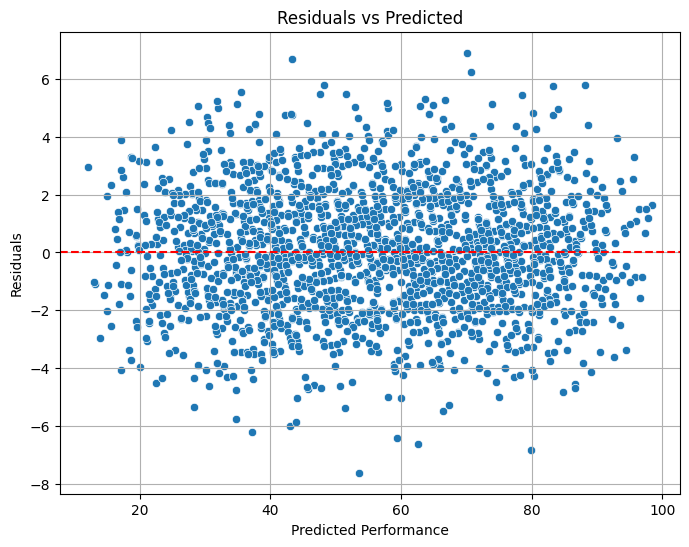

In [26]:
residuals = y_test - y_pred_test
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_test, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Performance")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

### **2. Actual vs Predicted Plot**

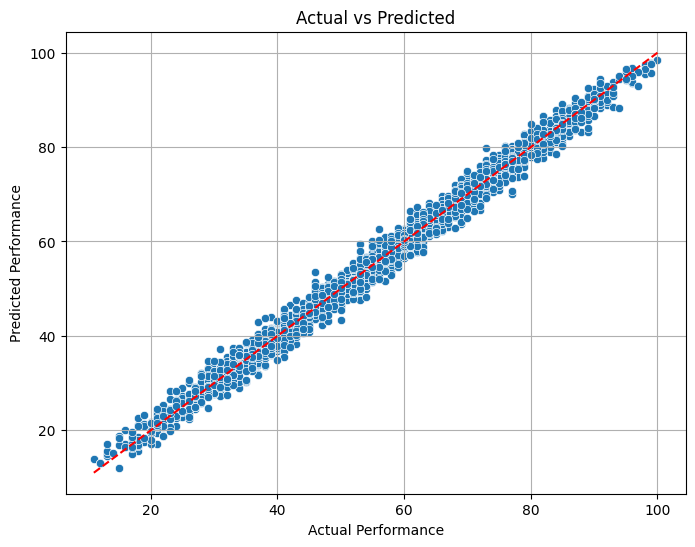

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

### **3. Distribution of Target Variable**

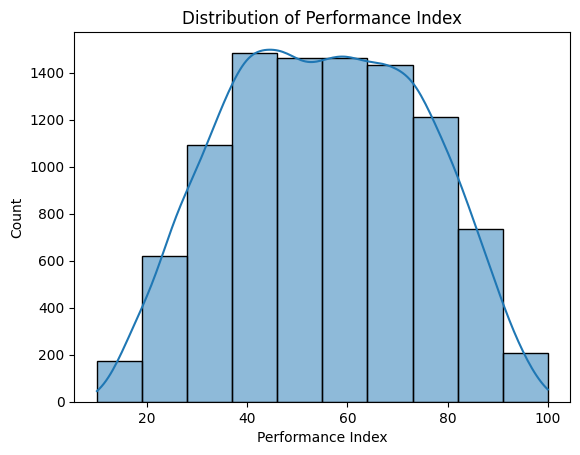

In [28]:
sns.histplot(data['Performance Index'], kde=True, bins=10)
plt.title("Distribution of Performance Index")
plt.xlabel("Performance Index")
plt.ylabel("Count")
plt.show()

##  **Step 10: Train & Compare Multiple Models**

### **Step 1: Initialize and Train Models**

In [29]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# XGBoost Regressor
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

###  **Step 2: Make Predictions**

In [30]:
# Store predictions in dictionary
model_predictions = {
    "Linear Regression": lr.predict(X_test),
    "Random Forest": rf.predict(X_test),
    "XGBoost": xgb.predict(X_test)
}

### **Step 3: Evaluate All Models**

In [31]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

for name, preds in model_predictions.items():
    evaluate_model(name, y_test, preds)



Linear Regression Evaluation:
R² Score: 0.99
MAE: 1.65
RMSE: 2.08

Random Forest Evaluation:
R² Score: 0.98
MAE: 1.90
RMSE: 2.37

XGBoost Evaluation:
R² Score: 0.99
MAE: 1.81
RMSE: 2.26


### **Step 4: Compare Predictions in Table**

In [32]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "LR_Pred": model_predictions["Linear Regression"],
    "RF_Pred": model_predictions["Random Forest"],
    "XGB_Pred": model_predictions["XGBoost"]
})
comparison_df["LR_Diff"] = abs(comparison_df["Actual"] - comparison_df["LR_Pred"])
comparison_df["RF_Diff"] = abs(comparison_df["Actual"] - comparison_df["RF_Pred"])
comparison_df["XGB_Diff"] = abs(comparison_df["Actual"] - comparison_df["XGB_Pred"])

print("\nComparison of Predictions:")
print(comparison_df.head(10))


Comparison of Predictions:
   Actual    LR_Pred    RF_Pred   XGB_Pred   LR_Diff   RF_Diff  XGB_Diff
0      47  46.480013  46.116667  45.644962  0.519987  0.883333  1.355038
1      76  80.285379  81.163333  81.482399  4.285379  5.163333  5.482399
2      62  61.065188  61.035357  61.275219  0.934812  0.964643  0.724781
3      23  22.706315  22.440000  22.963844  0.293685  0.560000  0.036156
4      76  74.836868  74.960000  74.591606  1.163132  1.040000  1.408394
5      83  84.194968  83.523333  82.929337  1.194968  0.523333  0.070663
6      60  61.993141  61.420000  61.104721  1.993141  1.420000  1.104721
7      51  50.337443  50.793333  51.393665  0.662557  0.206667  0.393665
8      38  38.898681  39.480000  38.659817  0.898681  1.480000  0.659817
9      58  55.753202  56.650000  56.201874  2.246798  1.350000  1.798126


### **Step 5: Plot Actual vs Predicted**


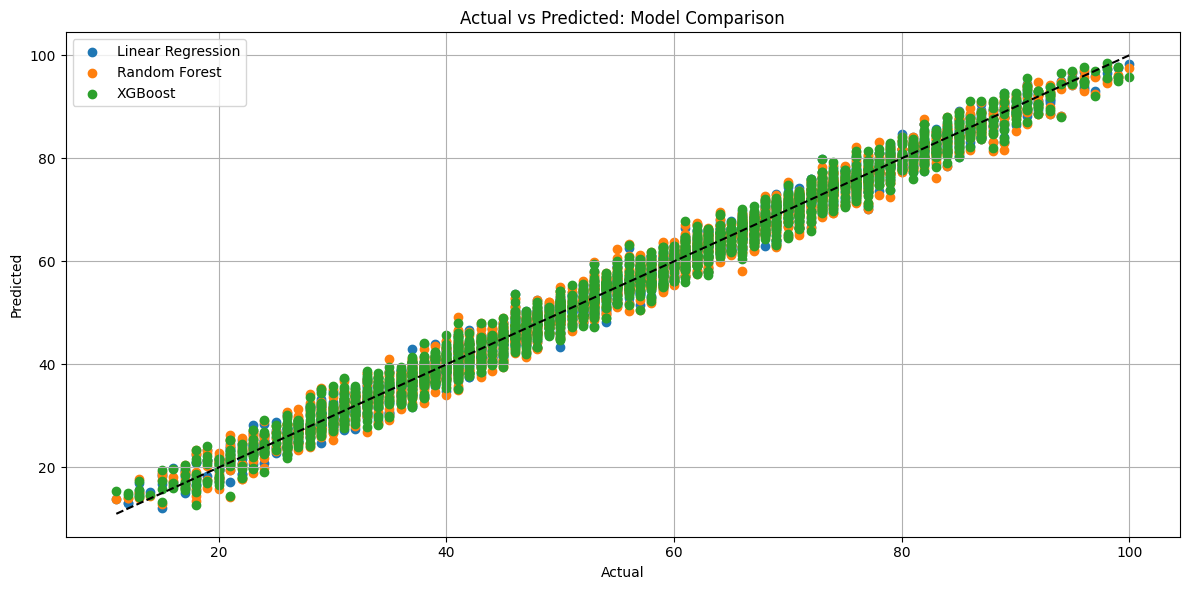

In [33]:
plt.figure(figsize=(12, 6))

for name, preds in model_predictions.items():
    plt.scatter(y_test, preds, label=name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: Model Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Step 11: Save Trained Models**

In [34]:
# Save Linear Regression model
joblib.dump(lr, "models/linear_regression_model.pkl")

# Save Random Forest model
joblib.dump(rf, "models/random_forest_model.pkl")

# Save XGBoost model
joblib.dump(xgb, "models/xgboost_model.pkl")

print("All models saved successfully!")

All models saved successfully!


## **Step 12: Load and Use a Model Later**

Linear Regression Predictions

In [35]:
# load a saved model
loaded_model = joblib.load("models/linear_regression_model.pkl")

# Make predictions
new_predictions = loaded_model.predict(X_test)
new_predictions

array([46.48001281, 80.2853795 , 61.06518835, ..., 77.08443628,
       86.24676576, 35.8793377 ])

Random Forest Predictions

In [36]:
# load a saved model
loaded_model = joblib.load("models/random_forest_model.pkl")

# Make predictions
new_predictions = loaded_model.predict(X_test)
new_predictions

array([46.11666667, 81.16333333, 61.03535714, ..., 77.08      ,
       85.99      , 35.99      ])

XGBoost Predictions

In [37]:
# load a saved model
loaded_model = joblib.load("models/xgboost_model.pkl")

# Make predictions
new_predictions = loaded_model.predict(X_test)
new_predictions

array([45.644962, 81.4824  , 61.27522 , ..., 76.54738 , 86.39874 ,
       36.731712], dtype=float32)